### Extract zipfile

In [3]:
import zipfile

zip_ref = zipfile.ZipFile('fake_news.zip')
zip_ref.extractall()

In [4]:
import pandas as pd

df = pd.read_csv('WELFake_Dataset.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


### clean the dataset

#### Nulls

In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
title,558
text,39
label,0


In [6]:
df.shape

(72134, 4)

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


In [9]:
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


#### reset index

* we have removed some rows so we have to reset the index

In [10]:
df = df.reset_index()

In [11]:
df.head()

,index,Unnamed: 0,title,text,label
0,0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
2,3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
3,4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
4,5,5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


### X and y

In [12]:
X = df['title']
y = df['label']

In [13]:
X.head()

,title
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
2,"Bobby Jindal, raised Hindu, uses story of Chri..."
3,SATAN 2: Russia unvelis an image of its terrif...
4,About Time! Christian Group Sues Amazon and SP...


#### we are  going to predict the that the news is whether fake or true by the title of that news

### steps for word to vect by the embadding layer

#### get the data

In [14]:
message = X.copy()
message.head()

,title
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
2,"Bobby Jindal, raised Hindu, uses story of Chri..."
3,SATAN 2: Russia unvelis an image of its terrif...
4,About Time! Christian Group Sues Amazon and SP...


#### clean the data

import the neccessarry libraries

In [15]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
corpus = []
ps = PorterStemmer()

for i in range(0,len(message)):

  line = re.sub('[^a-zA-Z0-9]',' ',message[i])
  line = line.lower()
  line = line.split()
  line = [ps.stem(word) for word in line if word not in stopwords.words('english')]
  line = ' '.join(line)

  corpus.append(line)



In [17]:
corpus

['law enforc high alert follow threat cop white 9 11bi blacklivesmatt fyf911 terrorist video',
 'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video',
 'bobbi jindal rais hindu use stori christian convers woo evangel potenti 2016 bid',
 'satan 2 russia unv imag terrifi new supernuk western world take notic',
 'time christian group sue amazon splc design hate group',
 'dr ben carson target ir never audit spoke nation prayer breakfast',
 'hous intel chair trump russia fake stori evid anyth video',
 'sport bar owner ban nfl game show true american sport like speak rural america video',
 'latest pipelin leak underscor danger dakota access pipelin',
 'gop senat smack punchabl alt right nazi internet',
 'may brexit offer would hurt cost eu citizen eu parliament',
 'schumer call trump appoint offici overse puerto rico relief',
 'watch hilari ad call question health age clinton crime famili boss',
 'chang expect espn polit agenda despit huge subscrib 

#### vocabulary size

In [18]:
voc_size = 5000

#### OHE

In [19]:
from tensorflow.keras.preprocessing.text import one_hot

ohe_docs = [one_hot(word,voc_size) for word in corpus]
ohe_docs

[[674,
  1326,
  1127,
  805,
  62,
  4190,
  4485,
  698,
  1254,
  3809,
  905,
  1430,
  4996,
  1290],
 [2061,
  981,
  529,
  4659,
  2231,
  2759,
  3038,
  2591,
  4373,
  3892,
  4861,
  1684,
  3837,
  1290],
 [1175, 890, 1002, 2108, 1857, 4560, 865, 4, 4156, 1215, 557, 650, 4817],
 [2287, 840, 1076, 2779, 4554, 482, 772, 4028, 2355, 3754, 1463, 2124],
 [2549, 865, 2355, 4899, 746, 1572, 4205, 113, 2355],
 [1233, 1169, 2659, 4348, 836, 673, 3883, 424, 1330, 4038, 1757],
 [4942, 1475, 3268, 1388, 1076, 4149, 4560, 149, 3272, 1290],
 [659,
  2044,
  4169,
  4756,
  1138,
  1282,
  4428,
  1958,
  1980,
  659,
  1426,
  4337,
  1925,
  864,
  1290],
 [4130, 2603, 2086, 1617, 1883, 4601, 4054, 2603],
 [3984, 2892, 2727, 943, 1547, 4932, 2446, 4172],
 [4116, 2973, 4080, 4244, 3888, 2428, 2745, 1416, 2745, 1679],
 [3943, 3162, 1388, 659, 140, 4123, 273, 3723, 2263],
 [2785, 3902, 120, 3162, 4051, 3398, 3420, 399, 4699, 1028, 1555],
 [2726, 4950, 1582, 3154, 1439, 4488, 2016, 969, 24

#### padding

In [20]:
df['count_by_words'] = df['title'].apply(lambda x: len(str(x).split()))
df['count_by_words'].max()

72

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

eq_sent_length = 75

pad_ohe_docs = pad_sequences(ohe_docs,padding = 'pre',maxlen=eq_sent_length)
pad_ohe_docs

array([[   0,    0,    0, ..., 1430, 4996, 1290],
       [   0,    0,    0, ..., 1684, 3837, 1290],
       [   0,    0,    0, ...,  557,  650, 4817],
       ...,
       [   0,    0,    0, ..., 4406, 4513,  223],
       [   0,    0,    0, ..., 3586, 2474,  718],
       [   0,    0,    0, ..., 4007,  399,  549]], dtype=int32)

#### train test split

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train,X_test,y_train,y_test = train_test_split(pad_ohe_docs,np.array(y),test_size=0.2,random_state=42)

#### Model Creation & Embadding layer :

* Converting word to vect and applying LSTM RNN on it

In [23]:
from tensorflow.keras.layers import Embedding,LSTM,Dense
from tensorflow.keras.models import Sequential




initialize the model

In [24]:

model = Sequential([
    Embedding(input_dim=voc_size,
              output_dim=20,
              input_shape = (eq_sent_length,)),

    LSTM(100),

    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


compile the model

In [25]:
model.compile(loss='binary_crossentropy',  # becuase of binary classification
              optimizer = 'adam',
              metrics = ['accuracy'])

fit the model

In [27]:
model.fit(X_train,y_train,
          batch_size=32,
          epochs = 10,
          validation_data=(X_test,y_test),
          )

Epoch 1/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.8033 - loss: 0.4209 - val_accuracy: 0.8899 - val_loss: 0.2592
Epoch 2/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9126 - loss: 0.2191 - val_accuracy: 0.8985 - val_loss: 0.2416
Epoch 3/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9247 - loss: 0.1897 - val_accuracy: 0.8988 - val_loss: 0.2438
Epoch 4/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9368 - loss: 0.1628 - val_accuracy: 0.8982 - val_loss: 0.2523
Epoch 5/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9450 - loss: 0.1430 - val_accuracy: 0.8998 - val_loss: 0.2652
Epoch 6/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9548 - loss: 0.1214 - val_accuracy: 0.8987 - val_loss: 0.2671
Epoch 7/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9627 - loss: 0.1030 - val_accuracy: 0.8960 - val_loss: 0.2980
Epoch 8/10
1789/1789 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9683 - loss: 0

predict the X_test

In [29]:
y_pred_prob = model.predict(X_test)
y_pred_prob

448/448 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[9.7394252e-01],
       [1.6693033e-03],
       [3.3101340e-05],
       ...,
       [9.9986517e-01],
       [3.2810214e-01],
       [9.8615104e-01]], dtype=float32)

In [32]:
y_pred = np.where( y_pred_prob >= 0.5,1,0)
y_pred

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

classification report

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      7094
           1       0.90      0.90      0.90      7214

    accuracy                           0.90     14308
   macro avg       0.90      0.90      0.90     14308
weighted avg       0.90      0.90      0.90     14308



confusion matrix

Text(0, 0.5, 'y_pred')

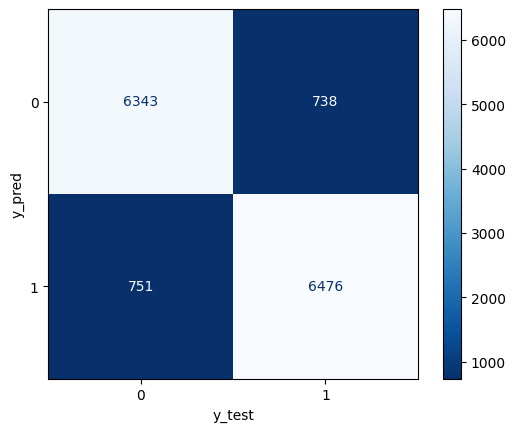

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test,y_pred)

d = ConfusionMatrixDisplay(cm)
d.plot(cmap='Blues_r')
plt.xlabel('y_test')
plt.ylabel('y_pred')